<h1><center> 
    Neural network design and application
</center></h1>

<h2><center>CPT_S 434/534, 2022 Spring</center></h2>

<h2><center>HW 2: NN basics -- Part 2 (68 pts)</center></h2>

### Name: *[INPUT YOUR NAME HERE]*

## This assignment includes:

## Coding in Python (pytorch): train softmax classifiers on MNIST (68 points)

Step 0: Install and configure: python ([Anaconda platform](https://docs.anaconda.com/anaconda/install/) recommended), [Jupyter Notebook](https://jupyter.org/install) and [pytorch](https://pytorch.org/get-started/) 

**Remark 1.** [Colab](https://colab.research.google.com) is a cloud platform that enables your Jupyter Notebooks (including this .ipynb assignment) to run with different runtime types (hardware acceleration is possible using GPU or TPU). You may also choose Colab to finish assignments (future assignments may require extensive computation that may be time-consuming on your laptop). 

**Remark 2.** If you use Colab, it is still required to convert your .ipynb to .html and submit **BOTH** files to Canvas. See [this page](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) on how to convert to .html

Step 1: Read provided code (with pytorch) to understand the logic of MLP with one hidden layer, so that you know how to implement in the following step and how to re-use the provided code

Step 2: Complete the code of MLP with two hidden layer of softmax classifier on [MNIST](http://yann.lecun.com/exdb/mnist/) using different hyper-parameters.

Step 3: Record and plot results to show accuracy convergence (against #epoch)

## Submission:

* Convert the .ipynb file to .html file (**save the execution outputs** to show your progress: otherwise grading may be affected)
    
* Upload **both** your .ipynb and .html files to Canvas.

* Deadline: Feb 20, 11:59 PM, Pacific time.

* Plots should be clear and easy to read.

## 1. (Read and run) Train feedforward networks with one hidden layer (one activation layer)

Epoch [1/10], Step [100/600], Loss: 0.6015
Epoch [1/10], Step [200/600], Loss: 0.2596
Epoch [1/10], Step [300/600], Loss: 0.2643
Epoch [1/10], Step [400/600], Loss: 0.1659
Epoch [1/10], Step [500/600], Loss: 0.1022
Epoch [1/10], Step [600/600], Loss: 0.3325
Accuracy of the network on the 10000 test images: 95.65 %
Accuracy of the network on the training images: 95.96 %
Epoch [2/10], Step [100/600], Loss: 0.1508
Epoch [2/10], Step [200/600], Loss: 0.0621
Epoch [2/10], Step [300/600], Loss: 0.0510
Epoch [2/10], Step [400/600], Loss: 0.1339
Epoch [2/10], Step [500/600], Loss: 0.1279
Epoch [2/10], Step [600/600], Loss: 0.0783
Accuracy of the network on the 10000 test images: 97.15 %
Accuracy of the network on the training images: 97.65833333333333 %
Epoch [3/10], Step [100/600], Loss: 0.0429
Epoch [3/10], Step [200/600], Loss: 0.0657
Epoch [3/10], Step [300/600], Loss: 0.0545
Epoch [3/10], Step [400/600], Loss: 0.0493
Epoch [3/10], Step [500/600], Loss: 0.2188
Epoch [3/10], Step [600/600],

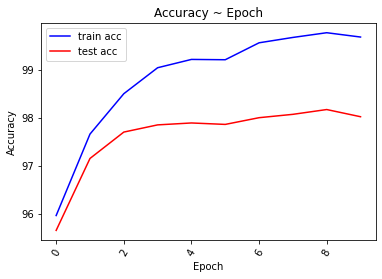

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy

# Device configuration: check if there is a configured GPU available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784        # 28 * 28
hidden_size = 500       # the output dimension of the linear model in each MLP hidden layer
num_classes = 10        # the number of classes
num_epochs = 10         # the number of epochs (each epoch: scanning the entire training set)
batch_size = 100        # how many samples are used in each iteration of SGD/Adam update
learning_rate = 0.001   # learning rate or step size used in gradient-based optimization algorithm

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define a model using class NeuralNet()
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Define loss function and optimization algorithm (optimizer)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001)  

# Train the model
# train_acc_list, test_acc_list = [],[]
total_step = len(train_loader)
test_acc_list, train_acc_list = [], []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Test the model and plot training/testing accuracy
    # In test phase, we don't need to compute gradients 
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
        test_acc_list.append(100 * correct / total)

        
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
        train_acc_list.append(100 * correct / total)
            
plt.plot(train_acc_list, '-b', label='train acc')
plt.plot(test_acc_list, '-r', label='test acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(rotation=60)
plt.title('Accuracy ~ Epoch')
# plt.savefig('assets/accr_{}.png'.format(cfg_idx))
plt.show()
        
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

## 2. (To finish, 17 pts) Implement and train a feedforward network with two hidden layers (one hidden layer means [one linear layer + one nonlinear activation function layer], so make sure you have two activation layers)

After training: plot training and testing accuracy (against #epoches) 

Hint: modify class NeuralNet

In [9]:
# Your code goes here
# 
# Hint: no need to implement the entire training process as in HW1. 
# Simply modify the above provided code, particularly "class NeuralNet()".
# For example, copy the above "class NeuralNet()" in this cell,
# and modify the functions "__initi__()" and "forward()" to re-define its structure.
# After modifying "class NeuralNet()", copy all necessary code to train on your code,
# including: define a model from class NeuralNet, define loss function and optimizer,
# training for-loops and plot figures
# 
# 

def train(model, optimizer, message = ""):
    print("=========================================================")
    print(message)
    # Define loss function and optimization algorithm (optimizer)
    criterion = nn.CrossEntropyLoss()

    # Train the model
    # train_acc_list, test_acc_list = [],[]
    total_step = len(train_loader)
    test_acc_list, train_acc_list = [], []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # Move tensors to the configured device
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Test the model and plot training/testing accuracy
        # In test phase, we don't need to compute gradients 
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
            test_acc_list.append(100 * correct / total)

            
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in train_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            print('Accuracy of the network on the training images: {} %'.format(100 * correct / total))
            train_acc_list.append(100 * correct / total)
                
    plt.plot(train_acc_list, '-b', label='train acc')
    plt.plot(test_acc_list, '-r', label='test acc')
    plt.legend()
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(rotation=60)
    plt.title('Accuracy ~ Epoch')
    # plt.savefig('assets/accr_{}.png'.format(cfg_idx))
    plt.show()
            
    # Save the model checkpoint
    torch.save(model.state_dict(), 'model.ckpt')


Epoch [1/10], Step [100/600], Loss: 0.3162
Epoch [1/10], Step [200/600], Loss: 0.3798
Epoch [1/10], Step [300/600], Loss: 0.1533
Epoch [1/10], Step [400/600], Loss: 0.1554
Epoch [1/10], Step [500/600], Loss: 0.2046
Epoch [1/10], Step [600/600], Loss: 0.0976
Accuracy of the network on the 10000 test images: 95.96 %
Accuracy of the network on the training images: 96.27 %
Epoch [2/10], Step [100/600], Loss: 0.1065
Epoch [2/10], Step [200/600], Loss: 0.0307
Epoch [2/10], Step [300/600], Loss: 0.1314
Epoch [2/10], Step [400/600], Loss: 0.0493
Epoch [2/10], Step [500/600], Loss: 0.0425
Epoch [2/10], Step [600/600], Loss: 0.0925
Accuracy of the network on the 10000 test images: 96.53 %
Accuracy of the network on the training images: 97.24666666666667 %
Epoch [3/10], Step [100/600], Loss: 0.0444
Epoch [3/10], Step [200/600], Loss: 0.0592
Epoch [3/10], Step [300/600], Loss: 0.1476
Epoch [3/10], Step [400/600], Loss: 0.1131
Epoch [3/10], Step [500/600], Loss: 0.0775
Epoch [3/10], Step [600/600]

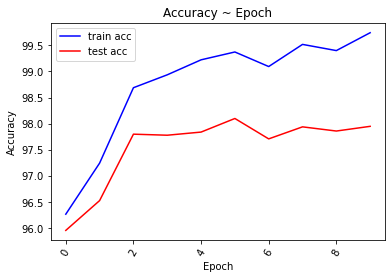

In [10]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        out = self.fc3(out)
        return out

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer)

## 3. (To finish, 3 pts) Use SGD (instead of Adam) to train your two-hidden-layer network

Hint: read [this document](https://pytorch.org/docs/stable/optim.html) for torch.optim and take a look at their *example* to understand how to change optimization algorithm. Hyper-parameters of optimization can be the same with the provided code


Epoch [1/10], Step [100/600], Loss: 2.3107
Epoch [1/10], Step [200/600], Loss: 2.3091
Epoch [1/10], Step [300/600], Loss: 2.3001
Epoch [1/10], Step [400/600], Loss: 2.3062
Epoch [1/10], Step [500/600], Loss: 2.3049
Epoch [1/10], Step [600/600], Loss: 2.2981
Accuracy of the network on the 10000 test images: 11.36 %
Accuracy of the network on the training images: 11.26 %
Epoch [2/10], Step [100/600], Loss: 2.2881
Epoch [2/10], Step [200/600], Loss: 2.2985
Epoch [2/10], Step [300/600], Loss: 2.2899
Epoch [2/10], Step [400/600], Loss: 2.2968
Epoch [2/10], Step [500/600], Loss: 2.3025
Epoch [2/10], Step [600/600], Loss: 2.2963
Accuracy of the network on the 10000 test images: 11.35 %
Accuracy of the network on the training images: 11.236666666666666 %
Epoch [3/10], Step [100/600], Loss: 2.2915
Epoch [3/10], Step [200/600], Loss: 2.3014
Epoch [3/10], Step [300/600], Loss: 2.2919
Epoch [3/10], Step [400/600], Loss: 2.2932
Epoch [3/10], Step [500/600], Loss: 2.2888
Epoch [3/10], Step [600/600

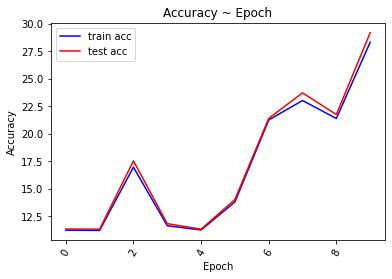

In [11]:
# Your code goes here
model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer)

## 4. (To finish, 3 pts each setting, 15 pts in total) Use SGD to train your two-hidden-layer network with different learning rate values in the range of $\{ 0.0001, 0.001, 0.01, 0.1, 1 \}$, and show which learning rate achieves the best testing accuracy.

learning rate: 0.0001
Epoch [1/10], Step [100/600], Loss: 2.3356
Epoch [1/10], Step [200/600], Loss: 2.2985
Epoch [1/10], Step [300/600], Loss: 2.2975
Epoch [1/10], Step [400/600], Loss: 2.3009
Epoch [1/10], Step [500/600], Loss: 2.2944
Epoch [1/10], Step [600/600], Loss: 2.3172
Accuracy of the network on the 10000 test images: 10.32 %
Accuracy of the network on the training images: 9.93 %
Epoch [2/10], Step [100/600], Loss: 2.2960
Epoch [2/10], Step [200/600], Loss: 2.3021
Epoch [2/10], Step [300/600], Loss: 2.2981
Epoch [2/10], Step [400/600], Loss: 2.3079
Epoch [2/10], Step [500/600], Loss: 2.3076
Epoch [2/10], Step [600/600], Loss: 2.3010
Accuracy of the network on the 10000 test images: 13.26 %
Accuracy of the network on the training images: 13.301666666666666 %
Epoch [3/10], Step [100/600], Loss: 2.3018
Epoch [3/10], Step [200/600], Loss: 2.3173
Epoch [3/10], Step [300/600], Loss: 2.3052
Epoch [3/10], Step [400/600], Loss: 2.2949
Epoch [3/10], Step [500/600], Loss: 2.2947
Epoch [

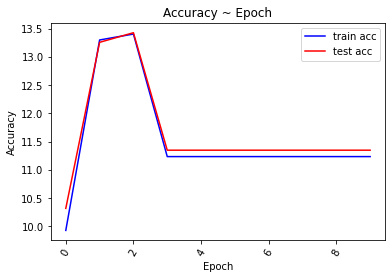

learning rate: 0.001
Epoch [1/10], Step [100/600], Loss: 2.3061
Epoch [1/10], Step [200/600], Loss: 2.3038
Epoch [1/10], Step [300/600], Loss: 2.2979
Epoch [1/10], Step [400/600], Loss: 2.3055
Epoch [1/10], Step [500/600], Loss: 2.2965
Epoch [1/10], Step [600/600], Loss: 2.3061
Accuracy of the network on the 10000 test images: 11.35 %
Accuracy of the network on the training images: 11.236666666666666 %
Epoch [2/10], Step [100/600], Loss: 2.2968
Epoch [2/10], Step [200/600], Loss: 2.2871
Epoch [2/10], Step [300/600], Loss: 2.2926
Epoch [2/10], Step [400/600], Loss: 2.2879
Epoch [2/10], Step [500/600], Loss: 2.2840
Epoch [2/10], Step [600/600], Loss: 2.2989
Accuracy of the network on the 10000 test images: 11.35 %
Accuracy of the network on the training images: 11.236666666666666 %
Epoch [3/10], Step [100/600], Loss: 2.2855
Epoch [3/10], Step [200/600], Loss: 2.2868
Epoch [3/10], Step [300/600], Loss: 2.2887
Epoch [3/10], Step [400/600], Loss: 2.2797
Epoch [3/10], Step [500/600], Loss: 2

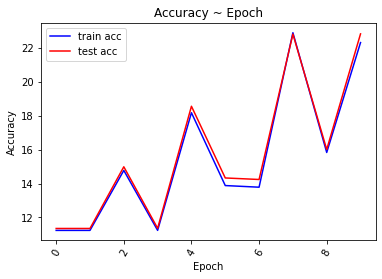

learning rate: 0.01
Epoch [1/10], Step [100/600], Loss: 2.2861
Epoch [1/10], Step [200/600], Loss: 2.2930
Epoch [1/10], Step [300/600], Loss: 2.2775
Epoch [1/10], Step [400/600], Loss: 2.2696
Epoch [1/10], Step [500/600], Loss: 2.2616
Epoch [1/10], Step [600/600], Loss: 2.2640
Accuracy of the network on the 10000 test images: 21.82 %
Accuracy of the network on the training images: 21.703333333333333 %
Epoch [2/10], Step [100/600], Loss: 2.2463
Epoch [2/10], Step [200/600], Loss: 2.1962
Epoch [2/10], Step [300/600], Loss: 2.1592
Epoch [2/10], Step [400/600], Loss: 2.1374
Epoch [2/10], Step [500/600], Loss: 2.0840
Epoch [2/10], Step [600/600], Loss: 2.0505
Accuracy of the network on the 10000 test images: 49.95 %
Accuracy of the network on the training images: 48.81 %
Epoch [3/10], Step [100/600], Loss: 1.9644
Epoch [3/10], Step [200/600], Loss: 1.8742
Epoch [3/10], Step [300/600], Loss: 1.8022
Epoch [3/10], Step [400/600], Loss: 1.6813
Epoch [3/10], Step [500/600], Loss: 1.5175
Epoch [3

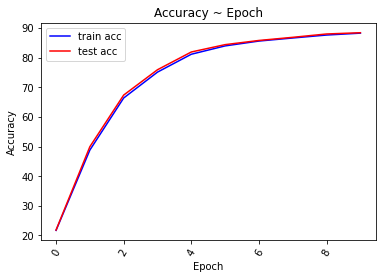

learning rate: 0.1
Epoch [1/10], Step [100/600], Loss: 2.2095
Epoch [1/10], Step [200/600], Loss: 1.3858
Epoch [1/10], Step [300/600], Loss: 0.9237
Epoch [1/10], Step [400/600], Loss: 0.5592
Epoch [1/10], Step [500/600], Loss: 0.5135
Epoch [1/10], Step [600/600], Loss: 0.3584
Accuracy of the network on the 10000 test images: 87.96 %
Accuracy of the network on the training images: 87.87833333333333 %
Epoch [2/10], Step [100/600], Loss: 0.4097
Epoch [2/10], Step [200/600], Loss: 0.2231
Epoch [2/10], Step [300/600], Loss: 0.3782
Epoch [2/10], Step [400/600], Loss: 0.2768
Epoch [2/10], Step [500/600], Loss: 0.2548
Epoch [2/10], Step [600/600], Loss: 0.3238
Accuracy of the network on the 10000 test images: 91.19 %
Accuracy of the network on the training images: 90.88166666666666 %
Epoch [3/10], Step [100/600], Loss: 0.3786
Epoch [3/10], Step [200/600], Loss: 0.3555
Epoch [3/10], Step [300/600], Loss: 0.2452
Epoch [3/10], Step [400/600], Loss: 0.3020
Epoch [3/10], Step [500/600], Loss: 0.288

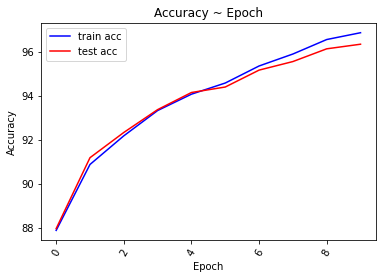

learning rate: 1
Epoch [1/10], Step [100/600], Loss: 2.3493
Epoch [1/10], Step [200/600], Loss: 1.8803
Epoch [1/10], Step [300/600], Loss: 1.0638
Epoch [1/10], Step [400/600], Loss: 0.4846
Epoch [1/10], Step [500/600], Loss: 0.2987
Epoch [1/10], Step [600/600], Loss: 0.3549
Accuracy of the network on the 10000 test images: 90.42 %
Accuracy of the network on the training images: 90.255 %
Epoch [2/10], Step [100/600], Loss: 0.3121
Epoch [2/10], Step [200/600], Loss: 0.2534
Epoch [2/10], Step [300/600], Loss: 0.1070
Epoch [2/10], Step [400/600], Loss: 0.2335
Epoch [2/10], Step [500/600], Loss: 0.1873
Epoch [2/10], Step [600/600], Loss: 0.0819
Accuracy of the network on the 10000 test images: 95.59 %
Accuracy of the network on the training images: 95.89666666666666 %
Epoch [3/10], Step [100/600], Loss: 0.1254
Epoch [3/10], Step [200/600], Loss: 0.0845
Epoch [3/10], Step [300/600], Loss: 0.0779
Epoch [3/10], Step [400/600], Loss: 0.1362
Epoch [3/10], Step [500/600], Loss: 0.1316
Epoch [3/10

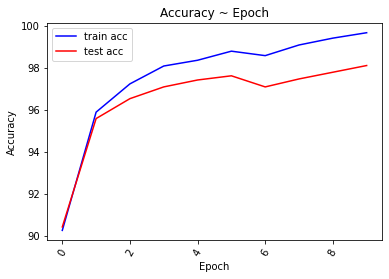

In [12]:
# Your code goes here
model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.0001")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.001")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.01")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.1")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 1")


## 5. (To finish, 3 pts each setting, 15 pts in total) Use Adam to train your two-hidden-layer network with different learning rate values in the range of $\{ 0.0001, 0.001, 0.01, 0.1, 1 \}$, and show which learning rate achieves the best testing accuracy.

learning rate: 0.0001
Epoch [1/10], Step [100/600], Loss: 1.6030
Epoch [1/10], Step [200/600], Loss: 0.9014
Epoch [1/10], Step [300/600], Loss: 0.5584
Epoch [1/10], Step [400/600], Loss: 0.5426
Epoch [1/10], Step [500/600], Loss: 0.4333
Epoch [1/10], Step [600/600], Loss: 0.3585
Accuracy of the network on the 10000 test images: 90.07 %
Accuracy of the network on the training images: 89.58166666666666 %
Epoch [2/10], Step [100/600], Loss: 0.3541
Epoch [2/10], Step [200/600], Loss: 0.2977
Epoch [2/10], Step [300/600], Loss: 0.2578
Epoch [2/10], Step [400/600], Loss: 0.2047
Epoch [2/10], Step [500/600], Loss: 0.2124
Epoch [2/10], Step [600/600], Loss: 0.4138
Accuracy of the network on the 10000 test images: 92.14 %
Accuracy of the network on the training images: 92.08166666666666 %
Epoch [3/10], Step [100/600], Loss: 0.2771
Epoch [3/10], Step [200/600], Loss: 0.3061
Epoch [3/10], Step [300/600], Loss: 0.2328
Epoch [3/10], Step [400/600], Loss: 0.3158
Epoch [3/10], Step [500/600], Loss: 0.

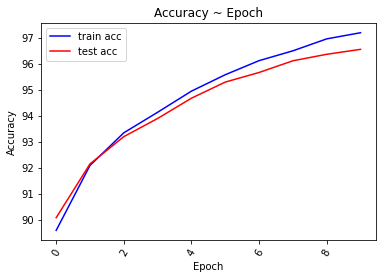

learning rate: 0.001
Epoch [1/10], Step [100/600], Loss: 0.5589
Epoch [1/10], Step [200/600], Loss: 0.2542
Epoch [1/10], Step [300/600], Loss: 0.2882
Epoch [1/10], Step [400/600], Loss: 0.2127
Epoch [1/10], Step [500/600], Loss: 0.2112
Epoch [1/10], Step [600/600], Loss: 0.1116
Accuracy of the network on the 10000 test images: 95.91 %
Accuracy of the network on the training images: 96.08166666666666 %
Epoch [2/10], Step [100/600], Loss: 0.1246
Epoch [2/10], Step [200/600], Loss: 0.1368
Epoch [2/10], Step [300/600], Loss: 0.0524
Epoch [2/10], Step [400/600], Loss: 0.1347
Epoch [2/10], Step [500/600], Loss: 0.0759
Epoch [2/10], Step [600/600], Loss: 0.0274
Accuracy of the network on the 10000 test images: 97.18 %
Accuracy of the network on the training images: 97.875 %
Epoch [3/10], Step [100/600], Loss: 0.0939
Epoch [3/10], Step [200/600], Loss: 0.0565
Epoch [3/10], Step [300/600], Loss: 0.0079
Epoch [3/10], Step [400/600], Loss: 0.1723
Epoch [3/10], Step [500/600], Loss: 0.0815
Epoch [

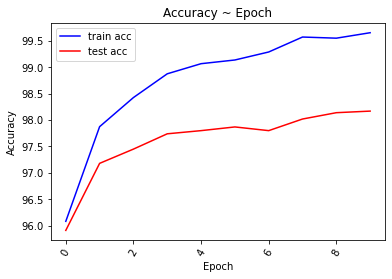

learning rate: 0.01
Epoch [1/10], Step [100/600], Loss: 0.4073
Epoch [1/10], Step [200/600], Loss: 0.1789
Epoch [1/10], Step [300/600], Loss: 0.0569
Epoch [1/10], Step [400/600], Loss: 0.1495
Epoch [1/10], Step [500/600], Loss: 0.0541
Epoch [1/10], Step [600/600], Loss: 0.0586
Accuracy of the network on the 10000 test images: 95.37 %
Accuracy of the network on the training images: 95.825 %
Epoch [2/10], Step [100/600], Loss: 0.1206
Epoch [2/10], Step [200/600], Loss: 0.2933
Epoch [2/10], Step [300/600], Loss: 0.3378
Epoch [2/10], Step [400/600], Loss: 0.1291
Epoch [2/10], Step [500/600], Loss: 0.1462
Epoch [2/10], Step [600/600], Loss: 0.0433
Accuracy of the network on the 10000 test images: 96.36 %
Accuracy of the network on the training images: 97.115 %
Epoch [3/10], Step [100/600], Loss: 0.2427
Epoch [3/10], Step [200/600], Loss: 0.0364
Epoch [3/10], Step [300/600], Loss: 0.1289
Epoch [3/10], Step [400/600], Loss: 0.1190
Epoch [3/10], Step [500/600], Loss: 0.1147
Epoch [3/10], Step 

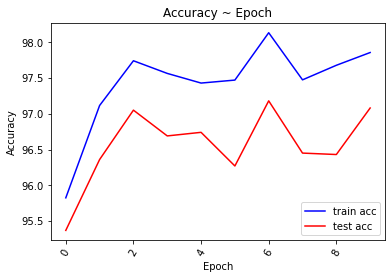

learning rate: 0.1
Epoch [1/10], Step [100/600], Loss: 5.2409
Epoch [1/10], Step [200/600], Loss: 3.9172
Epoch [1/10], Step [300/600], Loss: 5.2678
Epoch [1/10], Step [400/600], Loss: 7.6843
Epoch [1/10], Step [500/600], Loss: 3.2256
Epoch [1/10], Step [600/600], Loss: 4.2332
Accuracy of the network on the 10000 test images: 14.73 %
Accuracy of the network on the training images: 14.465 %
Epoch [2/10], Step [100/600], Loss: 3.4818
Epoch [2/10], Step [200/600], Loss: 3.5680
Epoch [2/10], Step [300/600], Loss: 5.8596
Epoch [2/10], Step [400/600], Loss: 4.4828
Epoch [2/10], Step [500/600], Loss: 5.3878
Epoch [2/10], Step [600/600], Loss: 2.8754
Accuracy of the network on the 10000 test images: 21.61 %
Accuracy of the network on the training images: 22.305 %
Epoch [3/10], Step [100/600], Loss: 3.0750
Epoch [3/10], Step [200/600], Loss: 6.9461
Epoch [3/10], Step [300/600], Loss: 5.5633
Epoch [3/10], Step [400/600], Loss: 3.4070
Epoch [3/10], Step [500/600], Loss: 2.6575
Epoch [3/10], Step [

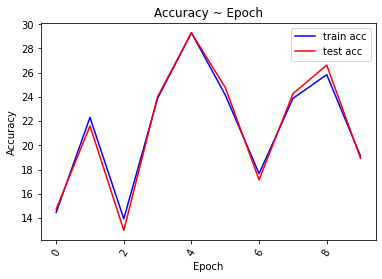

learning rate: 1
Epoch [1/10], Step [100/600], Loss: 177.2788
Epoch [1/10], Step [200/600], Loss: 96.3332
Epoch [1/10], Step [300/600], Loss: 44.2089
Epoch [1/10], Step [400/600], Loss: 135.8393
Epoch [1/10], Step [500/600], Loss: 135.8102
Epoch [1/10], Step [600/600], Loss: 164.1679
Accuracy of the network on the 10000 test images: 10.09 %
Accuracy of the network on the training images: 9.915 %
Epoch [2/10], Step [100/600], Loss: 133.0384
Epoch [2/10], Step [200/600], Loss: 146.6793
Epoch [2/10], Step [300/600], Loss: 123.7975
Epoch [2/10], Step [400/600], Loss: 180.5806
Epoch [2/10], Step [500/600], Loss: 80.3502
Epoch [2/10], Step [600/600], Loss: 71.3280
Accuracy of the network on the 10000 test images: 9.58 %
Accuracy of the network on the training images: 9.863333333333333 %
Epoch [3/10], Step [100/600], Loss: 63.6055
Epoch [3/10], Step [200/600], Loss: 104.7249
Epoch [3/10], Step [300/600], Loss: 91.8286
Epoch [3/10], Step [400/600], Loss: 118.3449
Epoch [3/10], Step [500/600], 

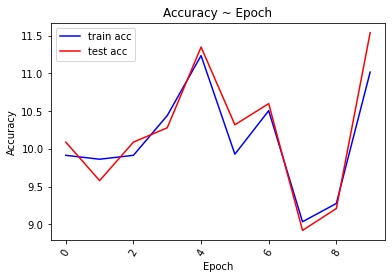

In [13]:
# Your code goes here
model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.0001")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.001")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.01")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 0.1")

model = NeuralNet2(input_size, hidden_size, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1, weight_decay=0.00001) 
train(model, optimizer, "learning rate: 1")

## 6. (To finish, 3 pts each setting, 9 pts in total) Change the dimension of the hidden variable (*hidden_size*) from $500$ to $100, 1000, 2000$, train the corresponding networks, and show the difference of them in testing accuracy.

Hint: you may use exactly the same setting with the above section 1, e.g., still use Adam with original setting for optimization

hidden_size: 100
Epoch [1/10], Step [100/600], Loss: 0.4319
Epoch [1/10], Step [200/600], Loss: 0.3033
Epoch [1/10], Step [300/600], Loss: 0.2667
Epoch [1/10], Step [400/600], Loss: 0.3164
Epoch [1/10], Step [500/600], Loss: 0.3646
Epoch [1/10], Step [600/600], Loss: 0.1892
Accuracy of the network on the 10000 test images: 93.25 %
Accuracy of the network on the training images: 93.35666666666667 %
Epoch [2/10], Step [100/600], Loss: 0.2231
Epoch [2/10], Step [200/600], Loss: 0.1371
Epoch [2/10], Step [300/600], Loss: 0.1900
Epoch [2/10], Step [400/600], Loss: 0.1255
Epoch [2/10], Step [500/600], Loss: 0.2303
Epoch [2/10], Step [600/600], Loss: 0.0955
Accuracy of the network on the 10000 test images: 95.36 %
Accuracy of the network on the training images: 95.75833333333334 %
Epoch [3/10], Step [100/600], Loss: 0.2297
Epoch [3/10], Step [200/600], Loss: 0.0890
Epoch [3/10], Step [300/600], Loss: 0.1025
Epoch [3/10], Step [400/600], Loss: 0.1069
Epoch [3/10], Step [500/600], Loss: 0.1154


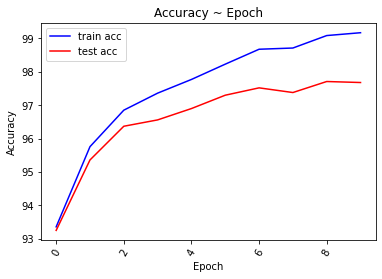

hidden_size: 1000
Epoch [1/10], Step [100/600], Loss: 0.4240
Epoch [1/10], Step [200/600], Loss: 0.1372
Epoch [1/10], Step [300/600], Loss: 0.1706
Epoch [1/10], Step [400/600], Loss: 0.0694
Epoch [1/10], Step [500/600], Loss: 0.1521
Epoch [1/10], Step [600/600], Loss: 0.1722
Accuracy of the network on the 10000 test images: 96.46 %
Accuracy of the network on the training images: 96.945 %
Epoch [2/10], Step [100/600], Loss: 0.0602
Epoch [2/10], Step [200/600], Loss: 0.0524
Epoch [2/10], Step [300/600], Loss: 0.1735
Epoch [2/10], Step [400/600], Loss: 0.1411
Epoch [2/10], Step [500/600], Loss: 0.0357
Epoch [2/10], Step [600/600], Loss: 0.0449
Accuracy of the network on the 10000 test images: 97.52 %
Accuracy of the network on the training images: 98.02166666666666 %
Epoch [3/10], Step [100/600], Loss: 0.1068
Epoch [3/10], Step [200/600], Loss: 0.0418
Epoch [3/10], Step [300/600], Loss: 0.0268
Epoch [3/10], Step [400/600], Loss: 0.0874
Epoch [3/10], Step [500/600], Loss: 0.0553
Epoch [3/1

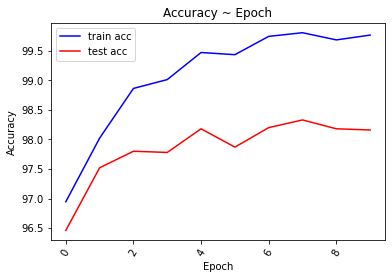

hidden_size: 2000
Epoch [1/10], Step [100/600], Loss: 0.3319
Epoch [1/10], Step [200/600], Loss: 0.2173
Epoch [1/10], Step [300/600], Loss: 0.1355
Epoch [1/10], Step [400/600], Loss: 0.2524
Epoch [1/10], Step [500/600], Loss: 0.1495
Epoch [1/10], Step [600/600], Loss: 0.2191
Accuracy of the network on the 10000 test images: 96.67 %
Accuracy of the network on the training images: 97.13166666666666 %
Epoch [2/10], Step [100/600], Loss: 0.0727
Epoch [2/10], Step [200/600], Loss: 0.0650
Epoch [2/10], Step [300/600], Loss: 0.1168
Epoch [2/10], Step [400/600], Loss: 0.0661
Epoch [2/10], Step [500/600], Loss: 0.0236
Epoch [2/10], Step [600/600], Loss: 0.0206
Accuracy of the network on the 10000 test images: 97.01 %
Accuracy of the network on the training images: 97.99333333333334 %
Epoch [3/10], Step [100/600], Loss: 0.0224
Epoch [3/10], Step [200/600], Loss: 0.0594
Epoch [3/10], Step [300/600], Loss: 0.0366
Epoch [3/10], Step [400/600], Loss: 0.0294
Epoch [3/10], Step [500/600], Loss: 0.0258

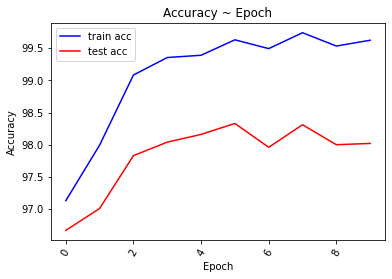

In [14]:
# Your code goes here

model = NeuralNet(input_size, 100, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 100")

model = NeuralNet(input_size, 1000, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 1000")

model = NeuralNet(input_size, 2000, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.00001) 
train(model, optimizer, "hidden_size: 2000")

## 7. (To finish, 3 pts each question, 9 pts in total) Answer the following three questions

### Q1 (3 pts): Is the best learning rate for SGD the same with the best learning rate for Adam?

**Answer**: 



### Q2 (3 pts): Read [this discussion](https://discuss.pytorch.org/t/how-does-sgd-weight-decay-work/33105/2) for the hyper-parameter of "weight decay" in optimizer and briefly describe how it works (hint: try to link it to anything we have learned in our class, such as the section of ML basic)

**Answer**:



### Q3 (3 pts): In the above section 6, how the dimension of hidden variable impacts the performance?

**Answer**:

